##### LINE BOT 串接 Dialogflow ( 搭配外部 Webhook )
本篇教學會延伸「LINE BOT 串接 Dialogflow」文章，並額外讓 Dialogflow 串接 Python 建立的伺服器 Webhook，做到使用者與 LINE BOT 聊天時，\
不僅可以使用 Dialogflow 自然語意分析的功能，也可以透過自己 Python 伺服器進行對應的邏輯處理。

##### 本篇文章所需知識 
要實作本篇文章的範例，需要先參考「LINE BOT 串接 Dialogflow」文章，先建立自己的 LINE BOT 以及開啟 Dialogflow 專案，並將 Dialogflow 與 LINE BOT 進行基本的連動。
* [LINE BOT 串接 Dialogflow](https://steam.oxxostudio.tw/category/python/example/line-bot-dialogflow-1.html)

如果已經有帳號或專案，直接點擊下方連結開始。
* [Google Dialogflow](https://dialogflow.cloud.google.com/)
* [LINE Developers](https://developers.line.biz/zh-hant/)
* [LINE 官方帳號管理頁面](https://tw.linebiz.com/login/)

##### 串接流程圖 
整個串接過程需要使用到「兩個 Webhook 網址」，參考下方的串接流程圖，可以了解如何使用 LINE 串接 Dialogflow 和自己的 Python 伺服器。

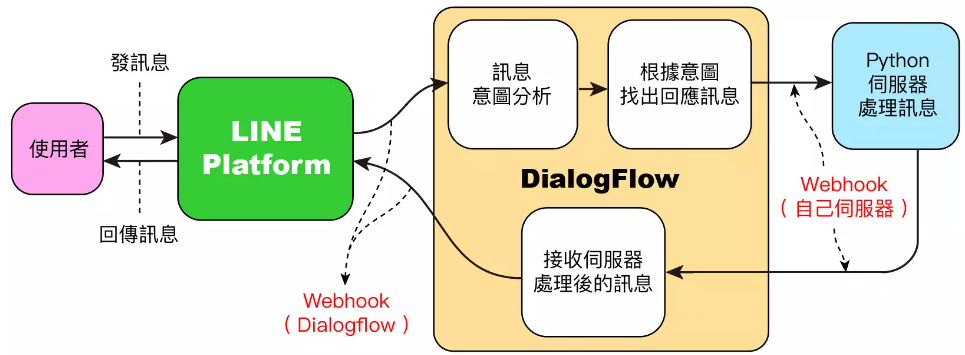

##### 使用 Python 建立 Webhook 網址 
參考「Dialogflow 串接 Webhook」文章，使用「本機環境 + ngrok」、「Colab + ngrok」或「Google Cloud Functions」架設 Webhook，\
建議先使用下方程式碼於本機環境測試，比較方便開發與除錯。

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route("/")
def home():
    return "<h1>hello world</h1>"

@app.route('/webhook', methods=['POST'])
def webhook():
    req = request.get_json()    # 轉換成 dict 格式
    print(req)
    reText = req['queryResult']['fulfillmentText']   # 取得回覆文字
    print(reText)
    return {
          "fulfillmentText": f'{reText} ( webhook )',
          "source": "webhookdata"
      }

app.run()

程式執行後，開啟瀏覽器，輸入剛剛 ngrok 產生的網址 ( 記得先安裝並設定 ngrok，網址後方「不要」加上 /webhook )，\
如果出現 hello world 的文字，表示順利建立成功。

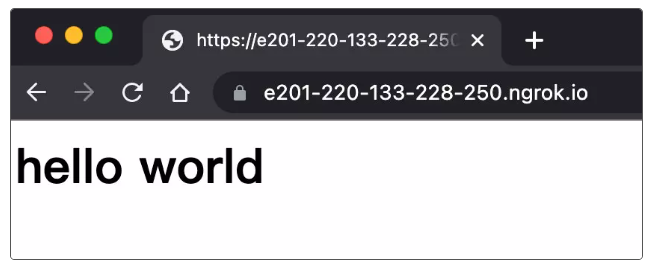

回到 Dialogflow 的專案裡，進入「Intents」頁籤，點擊需要串接 Webhook 的 Intent，進入後在最下方勾選「Enable webhook call for this intent」，\
表示該 Intent 會透過 Webhook 處理後再進行回覆 ( 如果 Webhook 失敗則會直接套用內容回覆 )。

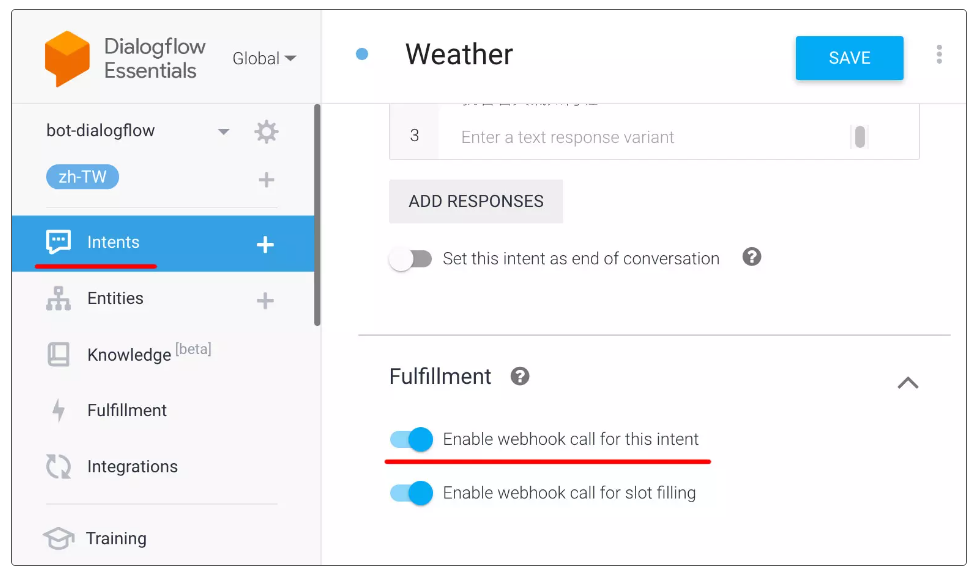

進入「Fulfillment」頁籤，勾選啟用 Webhook，將剛剛產生的 Webhook 貼上並儲存 ( 如果是本地端或 Colab 網址，後方「要」加上 /webhook )

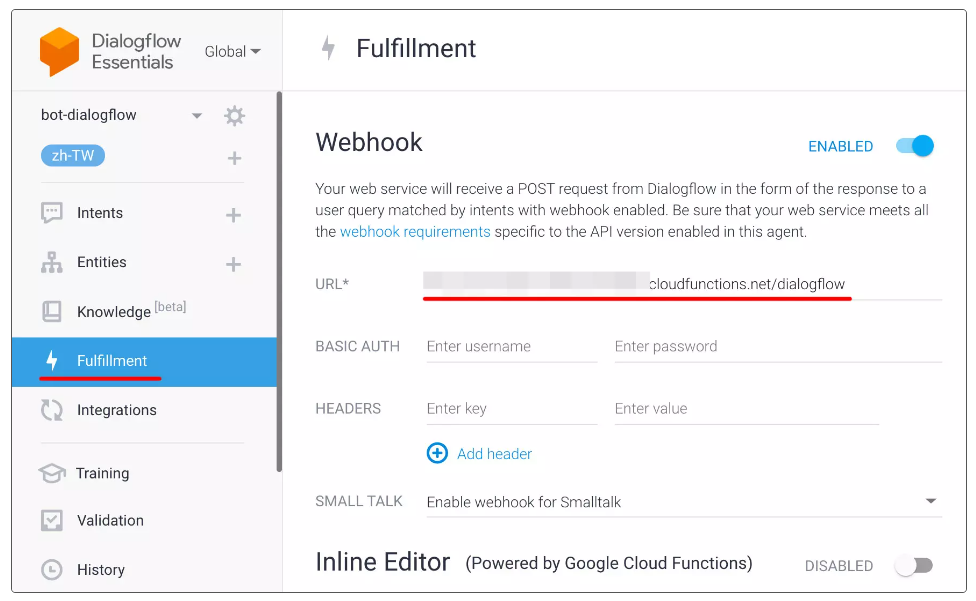

完成後在右側的聊天測試裡，輸入一些文字就可以看見機器人的自動回覆，如果回覆文字的後方有加上\
( webhook ) 文字，表示已經順利串接 Webhook ( 額外加上的文字是在 Webhook 伺服器端加入的，可以自行修改程式 )。

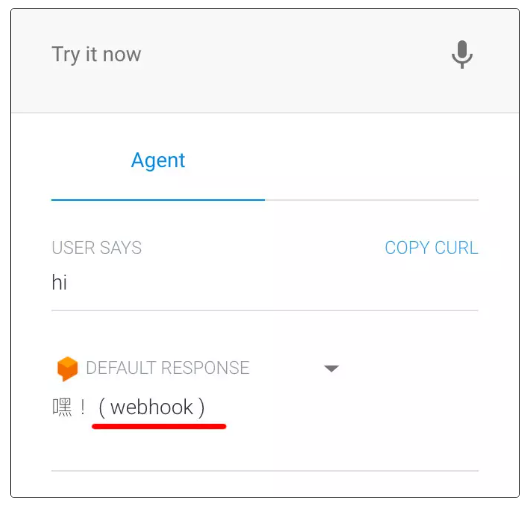

##### 搭配 LINE BOT 測試 
開啟 LINE 與 LINE BOT 的聊天視窗，輸入聊天內容，就可以看見已經透過自訂的 Webhook 網址進行回覆 ( 回覆訊息後方會有自行添加的 webhook 文字 )

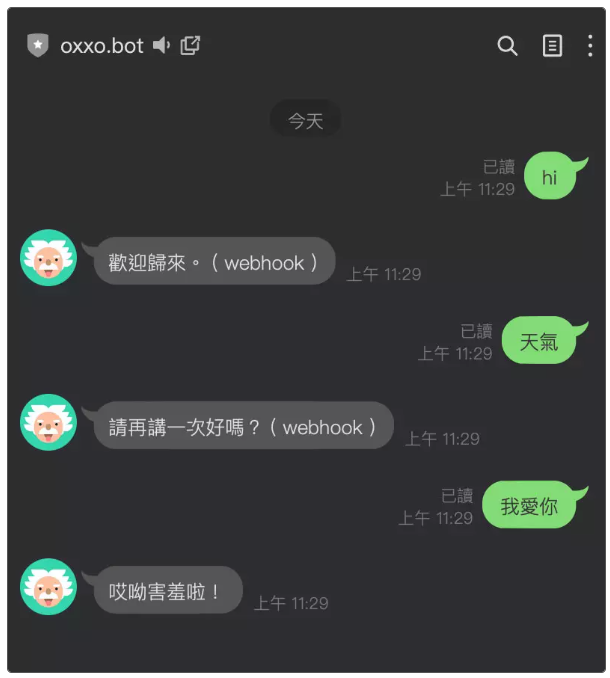

Enable Webhook call for this intent 
如果發現回傳的訊息，是沒有經過自己架設的 Python Webhook 伺服器( 例如上圖，最後一句「我愛你」的回覆後方並沒有 webhook )，\
表示該 Intent 沒有勾選 Enable Webhook call for this intent，只要進到該 Intent 裡，將其勾選啟用，即可正常運作。

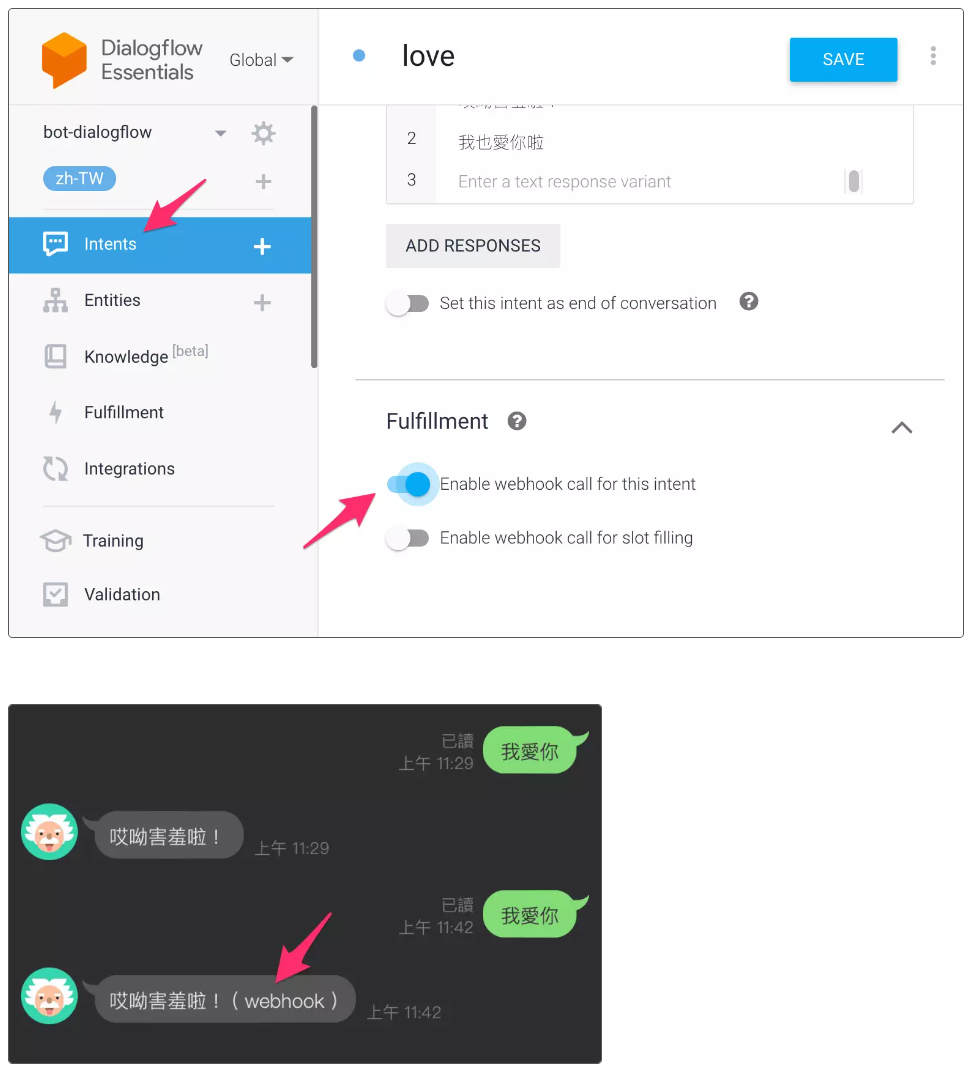

##### 小結 
如果已經能夠將 LINE 與 Dialogflow、自訂的 Python 伺服器串接，就能做到能辨識自然語言以及邏輯判斷的 LINE BOT 機器人。